In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('ML471_S1_Datafile_Concept.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.asfreq('MS')


In [4]:
# Single Exponential Smoothing (SES)
# Let's try to match the visualization. SES usually has a low alpha for high smoothing.
model_ses = SimpleExpSmoothing(df['Consumption']).fit(smoothing_level=0.2, optimized=False)
df['SES'] = model_ses.fittedvalues

# Double Exponential Smoothing (Holt's Method)
model_holt = ExponentialSmoothing(df['Consumption'], trend='add').fit()
df['Holt'] = model_holt.fittedvalues

# Triple Exponential Smoothing (Holt-Winters Method)
model_hw = ExponentialSmoothing(df['Consumption'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Holt-Winters'] = model_hw.fittedvalues


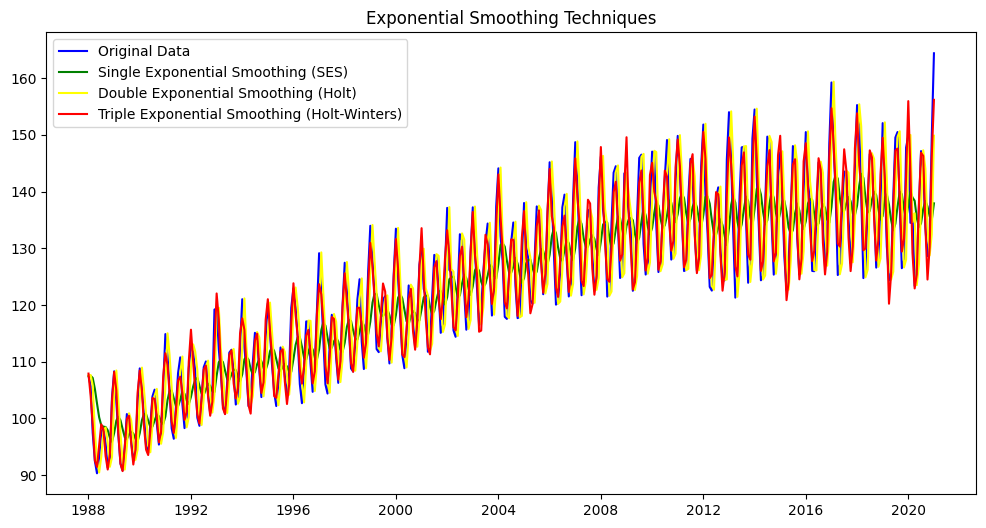

In [5]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Original Data', color='blue')
plt.plot(df.index, df['SES'], label='Single Exponential Smoothing (SES)', color='green')
plt.plot(df.index, df['Holt'], label='Double Exponential Smoothing (Holt)', color='yellow')
plt.plot(df.index, df['Holt-Winters'], label='Triple Exponential Smoothing (Holt-Winters)', color='red')

plt.title('Exponential Smoothing Techniques')
plt.legend()
plt.show()
